<a href="https://colab.research.google.com/github/alirkorkmaz/Diyabet-Veri-Seti-ile-Makine-Ogrenmesi-Uyglamalari/blob/main/Sat%C4%B1rVeS%C3%BCtunEksikDengeli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Kütüphanelerin İmport Edilmesi

In [ ]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt    # visualization library (görselleştirme kütüphanesi)
import seaborn as sns         # visualization library (görselleştirme kütüphanesi)
import missingno as msno      # visualization library (görselleştirme kütüphanesi)

from sklearn.preprocessing import RobustScaler # Standartlaştırma için kullanılan kütüphane 
from sklearn.model_selection import train_test_split  # veri setinin test ve train olarak ayrılması 
from imblearn.over_sampling import SMOTE # veri setinin dengeli hale gertirmek için kullanılan kütüphane 

# Makine öğrenmesi algoritmaları için gereken kütüphaneler 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,f1_score,recall_score,roc_auc_score, roc_curve
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier as randomForest
from sklearn.ensemble import GradientBoostingClassifier as gradientBoosting
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier as xgBoost
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve   # roc eğrisi için kullanılan kütüphane 
from sklearn.metrics import RocCurveDisplay
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit, GridSearchCV   # Hiper parametre için kullanılan kütüphane 

In [ ]:
dataFrame = pd.read_csv("/content/drive/MyDrive/diabetes.csv")

In [ ]:
df1 = dataFrame.copy()

In [ ]:
df1 = pd.DataFrame(df1)

In [ ]:
df1.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
# bu değerden kişilerin diyabet olanarı ve olmayanlarını direk görüyoruz 
df1["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



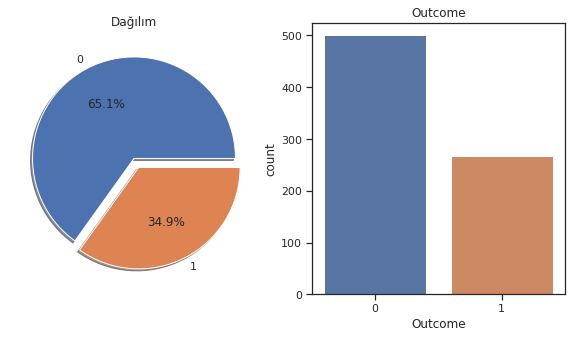

In [ ]:
f,ax=plt.subplots(1,2,figsize=(10,5))
df1['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Dağılım')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=df1,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

In [ ]:
df1.isnull().sum()  # null değer gözükmüyor 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df1.where(df1["Pregnancies"] == 0).value_counts().sum()        # öznitelikler içindeki sıfır değerleri buluyoruz


111

In [ ]:
df1.where(df1["Glucose"] == 0).value_counts().sum()        # öznitelikler içindeki sıfır değerleri buluyoruz


5

In [ ]:
df1.where(df1["BloodPressure"] == 0).value_counts().sum()        # öznitelikler içindeki sıfır değerleri buluyoruz


35

In [ ]:
df1.where(df1["SkinThickness"] == 0).value_counts().sum()        # öznitelikler içindeki sıfır değerleri buluyoruz


227

In [ ]:
df1.where(df1["Insulin"] == 0).value_counts().sum()        # öznitelikler içindeki sıfır değerleri buluyoruz


374

In [ ]:
df1.where(df1["BMI"] == 0).value_counts().sum()        # öznitelikler içindeki sıfır değerleri buluyoruz


11

In [ ]:
df1.where(df1["DiabetesPedigreeFunction"] == 0).value_counts().sum()        # öznitelikler içindeki sıfır değerleri buluyoruz


0

In [ ]:
df1.where(df1["Age"] == 0).value_counts().sum()        # öznitelikler içindeki sıfır değerleri buluyoruz


0

 * Insulin ve SkinThickness sütunaları tamamen kaldırıldı 
 * Glucose, BloodPressure,BMI sıfır olan satırları kaldırıldı

In [ ]:
df1[["Glucose","BloodPressure",
     "BMI"]] = df1[["Glucose","BloodPressure",
     "BMI"]].replace(0,np.NaN)
df1.isnull().sum()

Pregnancies                  0
Glucose                      5
BloodPressure               35
SkinThickness                0
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

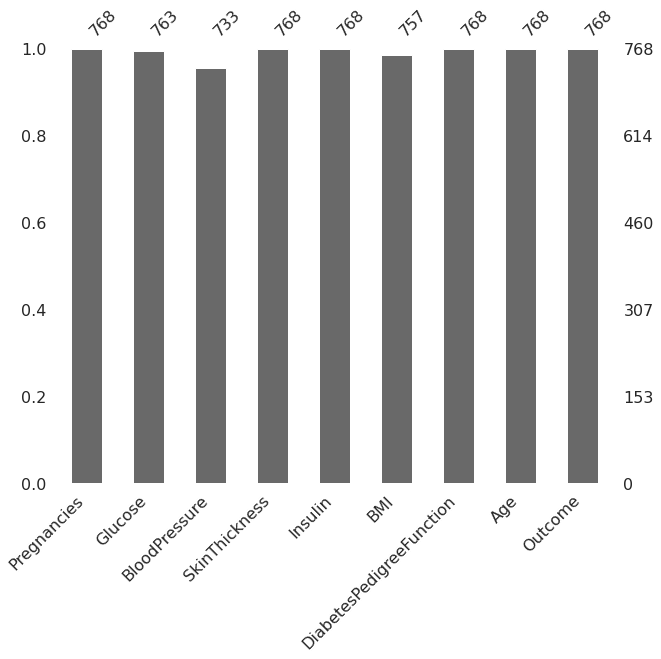

In [ ]:
msno.bar(df1,figsize=(10,8))
plt.show()


In [ ]:
df1 = df1.drop("Insulin", axis='columns')
# hocanın sütun olarak çıkartın dediği veriler 

In [ ]:
df1 = df1.drop("SkinThickness", axis='columns')

In [ ]:
df1.dropna(inplace = True)


In [ ]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               724 non-null    int64  
 1   Glucose                   724 non-null    float64
 2   BloodPressure             724 non-null    float64
 3   BMI                       724 non-null    float64
 4   DiabetesPedigreeFunction  724 non-null    float64
 5   Age                       724 non-null    int64  
 6   Outcome                   724 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 45.2 KB


## Veri Setini Dengeli Hale Getirme

In [ ]:
# Standartlaştırma 
rob_scaler = RobustScaler()
df1['Pregnancies'] = rob_scaler.fit_transform(df1['Pregnancies'].values.reshape(-1,1))
df1['Glucose'] = rob_scaler.fit_transform(df1['Glucose'].values.reshape(-1,1))
df1['BloodPressure'] = rob_scaler.fit_transform(df1['BloodPressure'].values.reshape(-1,1))
df1['BMI'] = rob_scaler.fit_transform(df1['BMI'].values.reshape(-1,1))
df1['DiabetesPedigreeFunction'] = rob_scaler.fit_transform(df1['DiabetesPedigreeFunction'].values.reshape(-1,1))
df1['Age'] = rob_scaler.fit_transform(df1['Age'].values.reshape(-1,1))
df1.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.6,0.733728,0.000,0.131868,0.648366,1.235294,1
1,-0.4,-0.757396,-0.375,-0.637363,-0.073203,0.117647,0
2,1.0,1.562130,-0.500,-1.000000,0.766013,0.176471,1
3,-0.4,-0.662722,-0.375,-0.472527,-0.554248,-0.470588,0
4,-0.6,0.473373,-2.000,1.175824,4.990850,0.235294,1


In [ ]:
# veri setini train ve test olarak ayırıyoruz
X = df1.drop("Outcome", axis=1)
y = df1["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)

In [ ]:
print(X_train.info())
print(X_train.shape)
print('_'*40)
print(X_test.info())
print(X_test.shape)
print('_'*40)
print(y_train.head())
print(y_train.shape)
print('_'*40)
print(y_test.head())
print(y_test.shape) #bunuda kullanabiliriz

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 256 to 70
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               579 non-null    float64
 1   Glucose                   579 non-null    float64
 2   BloodPressure             579 non-null    float64
 3   BMI                       579 non-null    float64
 4   DiabetesPedigreeFunction  579 non-null    float64
 5   Age                       579 non-null    float64
dtypes: float64(6)
memory usage: 31.7 KB
None
(579, 6)
________________________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 301 to 346
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               145 non-null    float64
 1   Glucose                   145 non-null    float64
 2   BloodPressure             14

In [ ]:
y_train.value_counts()  #dengesiz veri seti

0    377
1    202
Name: Outcome, dtype: int64

In [ ]:
# Smote uygulanması (Eğitim setine uygulanıyor)
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

In [ ]:
y_smote.value_counts()    # dengeli veri seti 


1    377
0    377
Name: Outcome, dtype: int64

## Veri görselleştirme

In [ ]:
dataR = pd.concat([X_smote,y_smote], axis=1)

In [ ]:

dataR["Outcome"] = pd.Categorical(dataR["Outcome"])

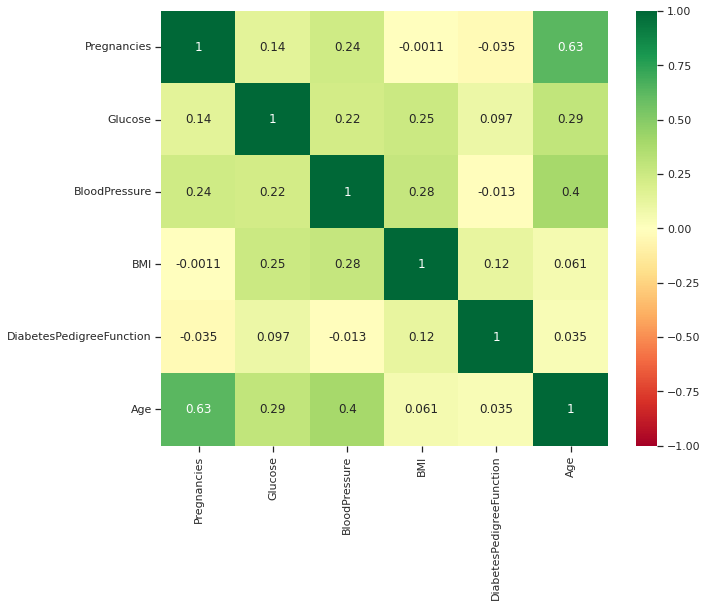

In [ ]:
corrSpearman = dataR.corr(method="spearman")

figure = plt.figure(figsize=(10,8))
sns.heatmap(corrSpearman,cmap="RdYlGn",vmax=1,vmin=-1,center=0,annot=True)
plt.show()

# korelasyon ile öznitelikler arasındaki orantılar incelendi 

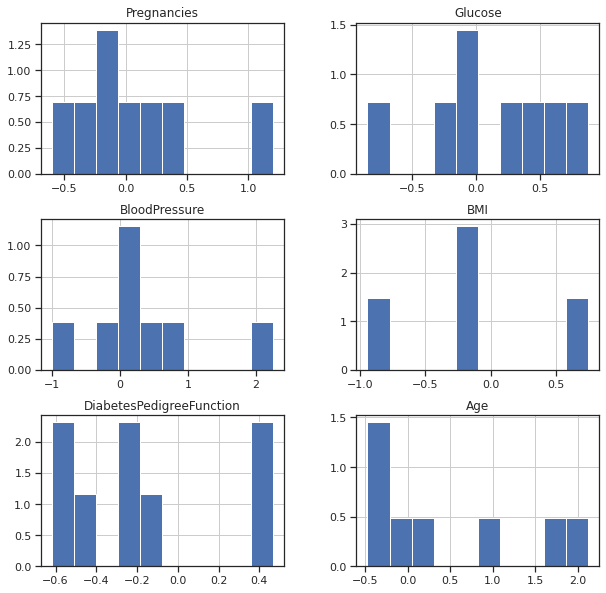

In [ ]:
dataR[0:8].hist(figsize=(10,10), density=True)
plt.show()

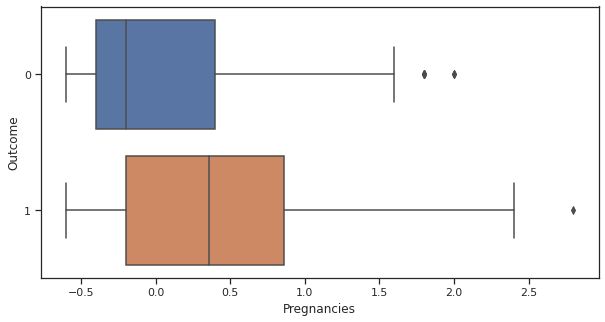

In [ ]:
figure = plt.figure(figsize=(10,5))
sns.boxplot(x="Pregnancies",y="Outcome",data=dataR)
plt.show()

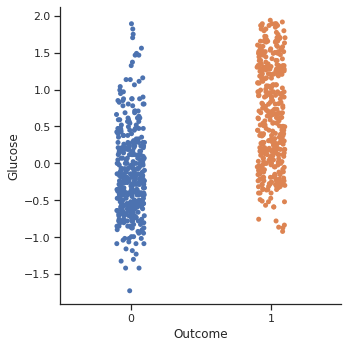

In [ ]:
sns.set_theme(style="ticks")
exercise = sns.load_dataset("exercise")
g = sns.catplot(x="Outcome", y="Glucose",data=dataR)

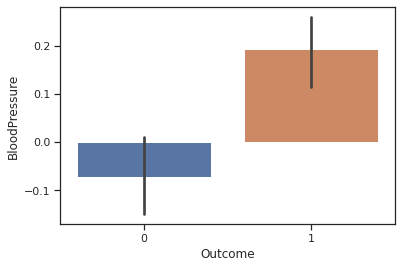

In [ ]:
ax = sns.barplot(x="Outcome", y="BloodPressure", data=dataR)
                 

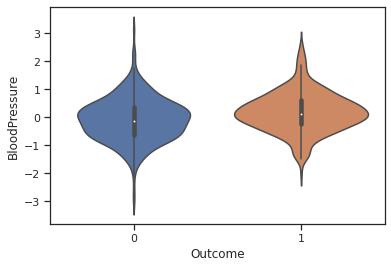

In [ ]:
sns.violinplot(x="Outcome", y="BloodPressure", data=dataR, size=6)



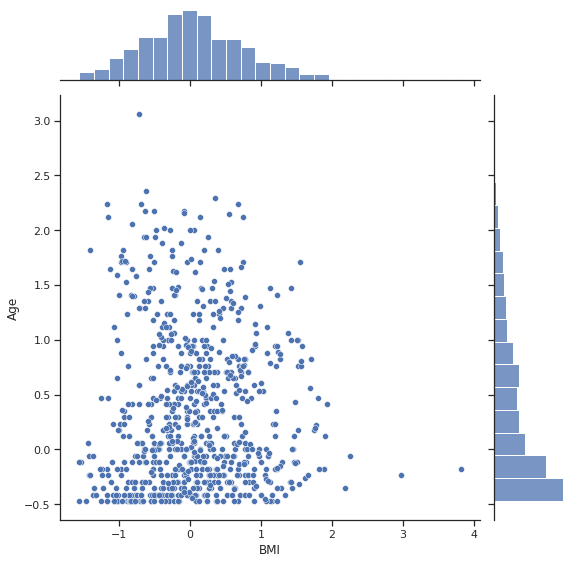

In [ ]:
sns.jointplot(x="BMI", y="Age", data=dataR, height=8)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


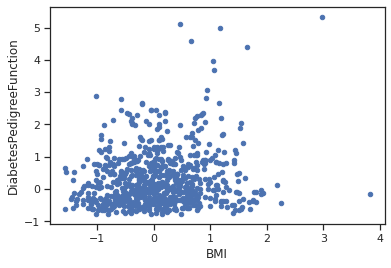

In [ ]:
dataR.plot(kind="scatter", x="BMI", y="DiabetesPedigreeFunction") # Ortalama ile dolan verilerin dağılımı belli oluyor


<Figure size 1440x576 with 0 Axes>

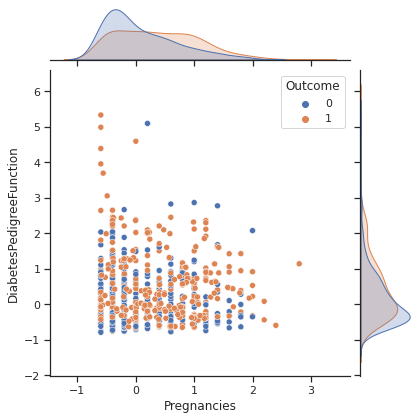

In [ ]:
figure = plt.figure(figsize=(20,8))
sns.jointplot(x="Pregnancies",y="DiabetesPedigreeFunction", color="#4CB391",hue="Outcome",data=dataR)
plt.show()

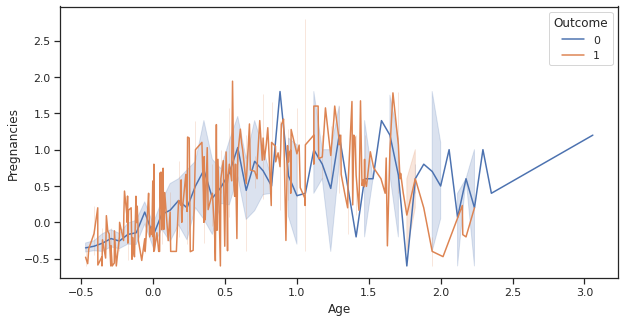

In [ ]:
figure = plt.figure(figsize=(10,5))
sns.lineplot(x="Age",y="Pregnancies",hue="Outcome",data=dataR)
plt.show()

# ortalamayı ve ortalama etrafında %95 güven aralığını çizerek her bir değerdeki çoklu ölçümleri toplamaktır
# özellikle daha büyük verilerle, bir güven aralığı yerine 
# standart sapmayı çizerek her zaman noktasında dağılımın yayılmasını temsil etmektir

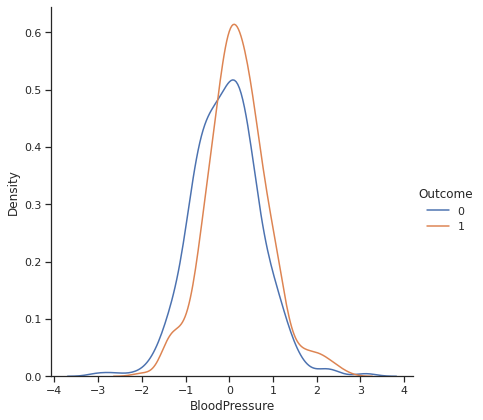

In [ ]:
sns.FacetGrid(dataR, hue="Outcome", height=6) \
   .map(sns.kdeplot, "BloodPressure") \
   .add_legend()

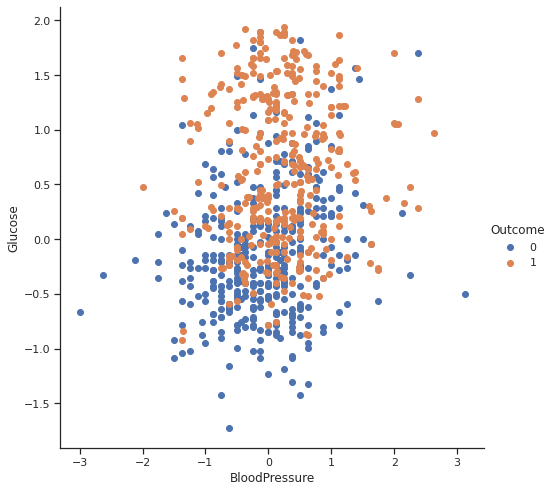

In [ ]:
sns.FacetGrid(dataR, hue="Outcome", height=7) \
   .map(plt.scatter, "BloodPressure", "Glucose") \
   .add_legend()

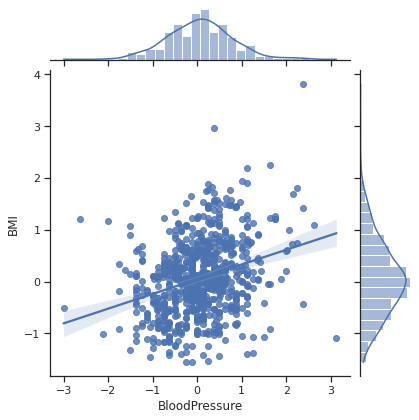

In [ ]:
sns.jointplot(data=dataR, x="BloodPressure", y="BMI", kind="reg")


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

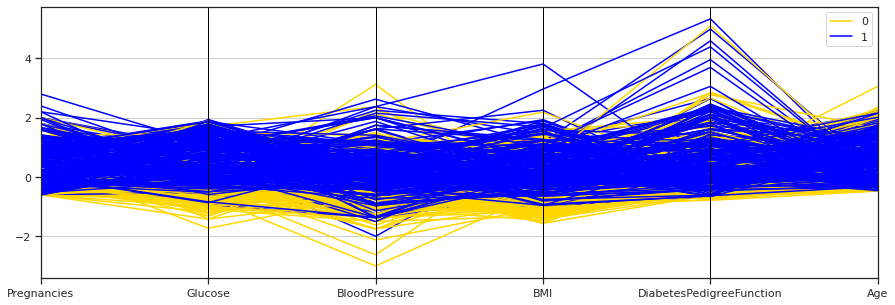

In [ ]:
plt.figure(figsize=(15,5))
pd.plotting.parallel_coordinates(dataR,'Outcome',color=('gold','blue'))
plt.xticks(rotation=0)

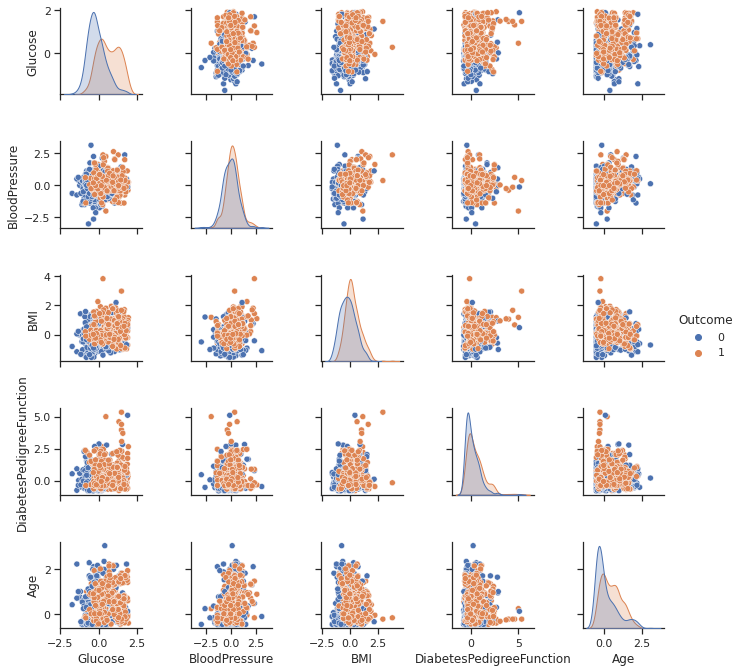

In [ ]:
sns.pairplot(dataR.drop("Pregnancies", axis=1), hue="Outcome", height=1.9)
# outcome değerlerine göre tüm niteliklerin gösterimi 

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,5))
ax = Axes3D(fig)
m= ax.scatter(dataR["Glucose"], dataR["Age"], dataR["Pregnancies"],s=20, alpha=0.9)
plt.title("simple 3D scatter plot")
ax.set_xlabel('Glucose', fontweight ='bold')
ax.set_ylabel('Age', fontweight ='bold')
ax.set_zlabel('Pregnancies', fontweight ='bold')

plt.show()


In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Mesh3d(x=dataR["Age"],
                   y=dataR["Pregnancies"],
                   z=dataR["Glucose"],
                   opacity=0.5,
                   color='rgba(244,22,100,0.6)'
                  )])

fig.update_layout(scene = dict(
                    xaxis_title='Age',
                    yaxis_title='Pregnancies',
                    zaxis_title='Glucose'))

fig.show()

In [ ]:
fig = go.Figure(data=[go.Mesh3d(x=dataR["Glucose"],
                   y=dataR["BMI"],
                   z=dataR["Age"],
                   opacity=0.5,
                   color='rgba(244,22,100,0.6)'
                  )])

fig.update_layout(scene = dict(
                    xaxis_title='Glucose',
                    yaxis_title='BMI',
                    zaxis_title='Insulin'))

fig.show()

In [ ]:
#import plotly.express as px
#fig = px.scatter(dataR, x='Age', y='Glucose', color='Outcome', size='BMI',
#                facet_col='BloodPressure', facet_col_wrap=4)
#fig.show()


## Makine öğrenmesi Modelleri :

* Projemiz çıktılarında kıyaslama yapılacaksa ; 
* TP: 1 değerinin 1 olarak tahmin edilmesi 
* TN: 0 değerlerini 0 olarak tahmin edilmesi 
* FP: 0 değerlerinin 1 olarak tahmin edilmesi
* FN: 1 değerlerinin o olarak tahmin edilmesi 

* Accuracy = TP+TN/TP+FP+FN+TN
* precision: TP / TP+FP 
* recall: TP / TP+FN
* F1 Score = 2*(Recall * Precision) / (Recall + Precision)
* Mikro ortalama: Precision ve recall score, modelin bireysel sınıfların gerçek pozitiflerinden (TP'ler), gerçek negatiflerinden (TN'ler), yanlış pozitiflerinden (FP'ler) ve yanlış negatiflerinden (FN'ler) hesaplanır.
* Makro-ortalama: Precision ve recall score, bireysel sınıfların precision ve recall score puanlarının aritmetik ortalaması olarak hesaplanır.
* Weighted Average (Ağırlıklı Ortalama): Ağırlıklı ortalama, bir veri setindeki sayıların değişen önem derecelerini hesaba katan bir hesaplamadır.Ağırlıklı ortalama hesaplanırken, son hesaplama yapılmadan önce veri setindeki her sayı önceden belirlenmiş bir ağırlıkla çarpılır.Basit bir ortalama veya aritmetik ortalama hesaplanırken, tüm sayılar eşit olarak ele alınır ve eşit ağırlık verilir. Ancak ağırlıklı ortalama, her bir veri noktasının göreli önemini önceden belirleyen ağırlıklar atar.


### GaussianNB

In [ ]:
gaussianNB = GaussianNB()
gaussianNB = gaussianNB.fit(X_smote, y_smote)

train_pred_gaussianNB = gaussianNB.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_gaussianNB)*100))

print("Confusion Matrix-GaussianNB-Train: ")
print(confusion_matrix(y_train, train_pred_gaussianNB))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_gaussianNB))

print("-"*40)

test_pred_gaussianNB = gaussianNB.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_gaussianNB)*100))

print("Confusion Matrix-GaussianNB-Test: ")
print(confusion_matrix(y_test, test_pred_gaussianNB))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_gaussianNB))

Train Accuracy : 75.820% 
Confusion Matrix-GaussianNB-Train: 
[[293  84]
 [ 56 146]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       377
           1       0.63      0.72      0.68       202

    accuracy                           0.76       579
   macro avg       0.74      0.75      0.74       579
weighted avg       0.77      0.76      0.76       579

----------------------------------------
Test Accuracy  : 73.103% 
Confusion Matrix-GaussianNB-Test: 
[[77 21]
 [18 29]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        98
           1       0.58      0.62      0.60        47

    accuracy                           0.73       145
   macro avg       0.70      0.70      0.70       145
weighted avg       0.74      0.73      0.73       145



In [ ]:

param_grid_nb = {
    'var_smoothing': np.logspace(-10,1, num=200)
}

cv = GridSearchCV(GaussianNB(),param_grid_nb,scoring = 'accuracy', cv=5,verbose=False,n_jobs=-1).fit(X_smote,y_smote)
print(cv.best_params_)
print(cv.best_score_)

{'var_smoothing': 1e-10}
0.7533068432671082


0.7499803030700948

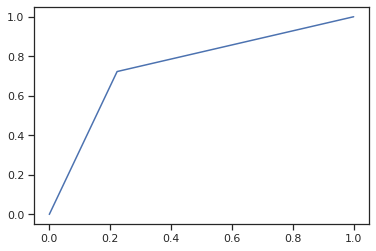

In [ ]:
fpr , tpr , thresolds = metrics.roc_curve(y_train , train_pred_gaussianNB)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

0.7013677811550153

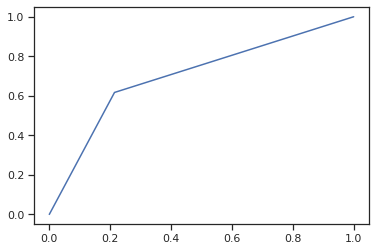

In [ ]:
fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_gaussianNB)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

### BernoulliNB

In [ ]:
bernoulliNB = BernoulliNB()
bernoulliNB.fit(X_smote, y_smote)

train_pred_bernoulliNB = bernoulliNB.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_bernoulliNB)*100))

print("Confusion Matrix-BernoulliNB-Train: ")
print(confusion_matrix(y_train, train_pred_bernoulliNB))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_bernoulliNB))

print("-"*40)


test_pred_bernoulliNB = bernoulliNB.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_bernoulliNB)*100))

print("Confusion Matrix-BernoulliNB-Test: ")
print(confusion_matrix(y_test, test_pred_bernoulliNB))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_bernoulliNB))



Train Accuracy : 69.948% 
Confusion Matrix-BernoulliNB-Train: 
[[261 116]
 [ 58 144]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.82      0.69      0.75       377
           1       0.55      0.71      0.62       202

    accuracy                           0.70       579
   macro avg       0.69      0.70      0.69       579
weighted avg       0.73      0.70      0.71       579

----------------------------------------
Test Accuracy  : 68.966% 
Confusion Matrix-BernoulliNB-Test: 
[[68 30]
 [15 32]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.82      0.69      0.75        98
           1       0.52      0.68      0.59        47

    accuracy                           0.69       145
   macro avg       0.67      0.69      0.67       145
weighted avg       0.72      0.69      0.70       145



In [ ]:
param = [{
    'alpha':[0.001,0.01,0.1,1.0,10.0],
    'binarize':[0.0,1.0,5.0,10.],
    'fit_prior':[True,False]
    
}]

cv = GridSearchCV(BernoulliNB(),param,scoring = 'accuracy', cv=5,n_jobs=-1).fit(X_smote,y_smote)
print(cv.best_params_)
print(cv.best_score_)

{'alpha': 0.001, 'binarize': 1.0, 'fit_prior': True}
0.6936158940397352


0.7025894897182026

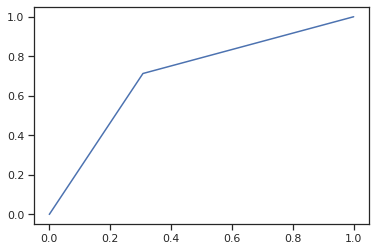

In [ ]:
fpr , tpr , thresolds = metrics.roc_curve(y_train, train_pred_bernoulliNB)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

0.6873643074250977

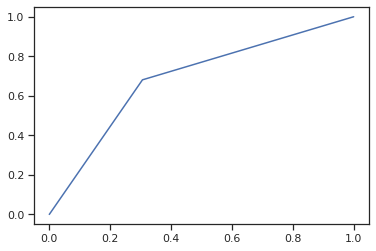

In [ ]:
fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_bernoulliNB)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

### LogisticRegression

In [ ]:
logisticRegression = LogisticRegression(random_state=123456)
logisticRegression.fit(X_smote, y_smote)


train_pred_logisticRegression = logisticRegression.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_logisticRegression)*100))

print("Confusion Matrix-LogisticRegression-Train: ")
print(confusion_matrix(y_train, train_pred_logisticRegression))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_logisticRegression))

print("-"*40)

test_pred_logisticRegression = logisticRegression.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_logisticRegression)*100))

print("Confusion Matrix-LogisticRegression-Test: ")
print(confusion_matrix(y_test, test_pred_logisticRegression))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_logisticRegression))

Train Accuracy : 77.893% 
Confusion Matrix-LogisticRegression-Train: 
[[301  76]
 [ 52 150]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       377
           1       0.66      0.74      0.70       202

    accuracy                           0.78       579
   macro avg       0.76      0.77      0.76       579
weighted avg       0.79      0.78      0.78       579

----------------------------------------
Test Accuracy  : 73.793% 
Confusion Matrix-LogisticRegression-Test: 
[[75 23]
 [15 32]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        98
           1       0.58      0.68      0.63        47

    accuracy                           0.74       145
   macro avg       0.71      0.72      0.71       145
weighted avg       0.75      0.74      0.74       145



In [ ]:
param ={"C":np.logspace(20,40,60), "penalty":["l2","none"]}  # logistic regresyon tekrar bak 

cv = GridSearchCV(LogisticRegression(), param, scoring = 'accuracy', cv=5,n_jobs=-1).fit(X_smote,y_smote)
print(cv.best_params_)
print(cv.best_score_)

{'C': 1e+20, 'penalty': 'l2'}
0.7599293598233996


0.7704913727447015

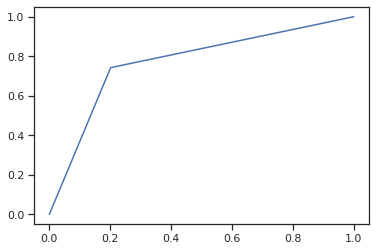

In [ ]:
fpr , tpr , thresolds = metrics.roc_curve(y_train, train_pred_logisticRegression)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

0.7230785931393834

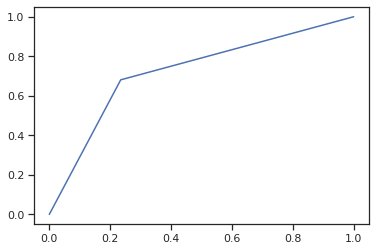

In [ ]:
fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_logisticRegression)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

### DecisionTree

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_smote, y_smote)

train_pred_decision_tree = decision_tree.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_decision_tree)*100))

print("Confusion Matrix-DecisionTreeClassifier-Train: ")
print(confusion_matrix(y_train, train_pred_decision_tree))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_decision_tree))

print("-"*40)

test_pred_decision_tree = decision_tree.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_decision_tree)*100))

print("Confusion Matrix-DecisionTreeClassifier-Test: ")
print(confusion_matrix(y_test, test_pred_decision_tree))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_decision_tree))

Train Accuracy : 100.000% 
Confusion Matrix-DecisionTreeClassifier-Train: 
[[377   0]
 [  0 202]]

Model Sonuçları

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       377
           1       1.00      1.00      1.00       202

    accuracy                           1.00       579
   macro avg       1.00      1.00      1.00       579
weighted avg       1.00      1.00      1.00       579

----------------------------------------
Test Accuracy  : 71.724% 
Confusion Matrix-DecisionTreeClassifier-Test: 
[[72 26]
 [15 32]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.83      0.73      0.78        98
           1       0.55      0.68      0.61        47

    accuracy                           0.72       145
   macro avg       0.69      0.71      0.69       145
weighted avg       0.74      0.72      0.72       145



In [ ]:
param_decision_tree = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

cv = GridSearchCV(DecisionTreeClassifier(), param_decision_tree, scoring = 'accuracy', cv=5,n_jobs=-1).fit(X_smote,y_smote)
print(cv.best_params_)
print(cv.best_score_)

{'criterion': 'gini', 'max_depth': 6}
0.783841059602649


1.0

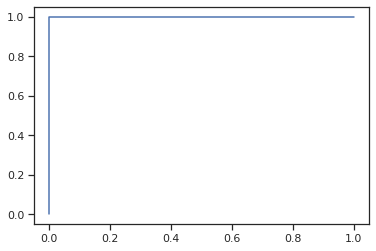

In [ ]:
fpr , tpr , thresolds = metrics.roc_curve(y_train, train_pred_decision_tree)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

0.7077724706904038

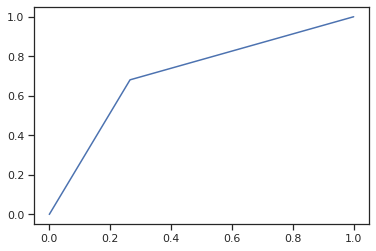

In [ ]:
fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_decision_tree)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

### RandomForest

In [ ]:
randomForest = randomForest()
randomForest.fit(X_smote,y_smote)

train_pred_randomForest = randomForest.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_randomForest)*100))
print("Confusion Matrix-randomForest-Train: ")
print(confusion_matrix(y_train, train_pred_randomForest))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_randomForest))

print("-"*40)

test_pred_randomForest = randomForest.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_randomForest)*100))

print("Confusion Matrix-randomForest-Test: ")
print(confusion_matrix(y_test, test_pred_randomForest))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_randomForest))

Train Accuracy : 100.000% 
Confusion Matrix-randomForest-Train: 
[[377   0]
 [  0 202]]

Model Sonuçları

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       377
           1       1.00      1.00      1.00       202

    accuracy                           1.00       579
   macro avg       1.00      1.00      1.00       579
weighted avg       1.00      1.00      1.00       579

----------------------------------------
Test Accuracy  : 78.621% 
Confusion Matrix-randomForest-Test: 
[[82 16]
 [15 32]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.85      0.84      0.84        98
           1       0.67      0.68      0.67        47

    accuracy                           0.79       145
   macro avg       0.76      0.76      0.76       145
weighted avg       0.79      0.79      0.79       145



In [ ]:
param_grid = {
    'bootstrap': [True,False],
    'max_depth': [80, 90, 100],
    #'max_features': [2,3,4],
    'min_samples_leaf': [1,2,3,4],
    'min_samples_split': [1,2,3,5,9],
    'n_estimators': [100, 200, 300]
}

cv = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', cv=5,n_jobs=-1).fit(X_smote,y_smote)
print(cv.best_params_)
print(cv.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


360 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 459, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib

{'bootstrap': False, 'max_depth': 90, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
0.8369271523178808


1.0

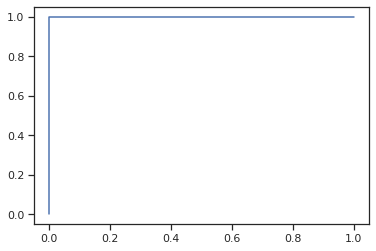

In [ ]:
fpr , tpr , thresolds = metrics.roc_curve(y_train, train_pred_randomForest)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

0.7587928788536692

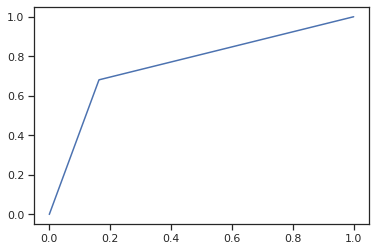

In [ ]:
fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_randomForest)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

### GradientBoosting

In [ ]:
gradientBoosting = gradientBoosting()
gradientBoosting.fit(X_smote, y_smote)

train_pred_gradientBoosting = gradientBoosting.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_gradientBoosting)*100))

print("Confusion Matrix-gradientBoosting-Train: ")
print(confusion_matrix(y_train, train_pred_gradientBoosting))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_gradientBoosting))

print("-"*40)

test_pred_gradientBoosting = gradientBoosting.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_gradientBoosting)*100))

print("Confusion Matrix-gradientBoosting-Test: ")
print(confusion_matrix(y_test, test_pred_gradientBoosting))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_gradientBoosting))

Train Accuracy : 91.192% 
Confusion Matrix-gradientBoosting-Train: 
[[343  34]
 [ 17 185]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       377
           1       0.84      0.92      0.88       202

    accuracy                           0.91       579
   macro avg       0.90      0.91      0.90       579
weighted avg       0.92      0.91      0.91       579

----------------------------------------
Test Accuracy  : 73.793% 
Confusion Matrix-gradientBoosting-Test: 
[[75 23]
 [15 32]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        98
           1       0.58      0.68      0.63        47

    accuracy                           0.74       145
   macro avg       0.71      0.72      0.71       145
weighted avg       0.75      0.74      0.74       145



In [ ]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01,0.1,0.5],
    "min_samples_split": np.linspace(0.1, 0.5, 3),
    "min_samples_leaf": np.linspace(0.1, 0.5, 3),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5,1.0,2.0,5.0],
    "n_estimators":[10]
    }


cv = GridSearchCV(GradientBoostingClassifier(), parameters, scoring = 'accuracy', cv=5,n_jobs=-1).fit(X_smote,y_smote)
print(cv.best_params_)
print(cv.best_score_)

{'criterion': 'friedman_mse', 'learning_rate': 0.5, 'loss': 'deviance', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 10, 'subsample': 1.0}
0.7838763796909493


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 525, in fit
    self._check_params()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 317, in _check_params
    raise ValueError("subsample must be in (0,1] but was %r" % self.subsample)
ValueError: subsa

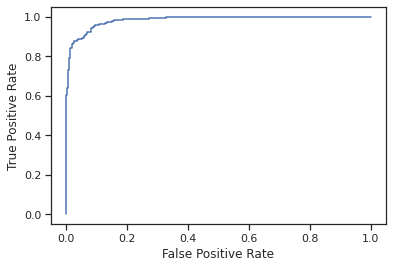

In [ ]:
clf = make_pipeline(StandardScaler(), GradientBoostingClassifier())
clf.fit(X_smote,y_smote)
y_score = clf.decision_function(X_smote)

fpr, tpr, _ = roc_curve(y_smote, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

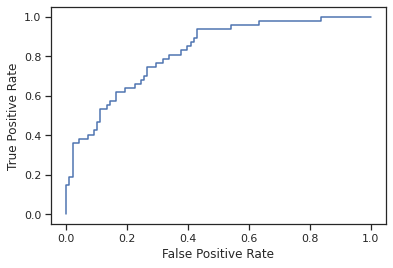

In [ ]:
clf = make_pipeline(StandardScaler(), GradientBoostingClassifier())
clf.fit(X_smote,y_smote)
y_score = clf.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

### xcBoost 

In [ ]:
xgBoost = xgBoost(use_label_encoder=False,eval_metric = 'error')

xgBoost.fit(X_smote, y_smote)

train_pred_xgBoost = xgBoost.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_xgBoost)*100))

print("Confusion Matrix-xgBoost-Train: ")
print(confusion_matrix(y_train, train_pred_xgBoost))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_xgBoost))

print("-"*40)

test_pred_xgBoost = xgBoost.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_xgBoost)*100))

print("Confusion Matrix-xgBoost-Test: ")
print(confusion_matrix(y_test, test_pred_xgBoost))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_xgBoost))

Train Accuracy : 87.910% 
Confusion Matrix-xgBoost-Train: 
[[327  50]
 [ 20 182]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       377
           1       0.78      0.90      0.84       202

    accuracy                           0.88       579
   macro avg       0.86      0.88      0.87       579
weighted avg       0.89      0.88      0.88       579

----------------------------------------
Test Accuracy  : 73.793% 
Confusion Matrix-xgBoost-Test: 
[[74 24]
 [14 33]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        98
           1       0.58      0.70      0.63        47

    accuracy                           0.74       145
   macro avg       0.71      0.73      0.72       145
weighted avg       0.76      0.74      0.74       145



In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [-1,0,1,2,3],
        'subsample': [0,1,2,3],
        'colsample_bytree': [0,1,2,3,4],
        'max_depth': [2,3, 4]
        }

cv = GridSearchCV(XGBClassifier(), params, scoring = 'accuracy', cv=5,n_jobs=-1).fit(X_smote,y_smote)
print(cv.best_params_)
print(cv.best_score_)

{'colsample_bytree': 1, 'gamma': 0, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 1}
0.8117086092715231


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


3780 fits failed out of a total of 4500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py",

0.8841820521574704

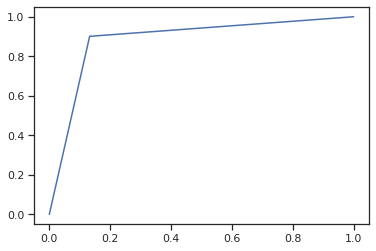

In [ ]:
fpr , tpr , thresolds = metrics.roc_curve(y_train, train_pred_xgBoost)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

0.7286148501953973

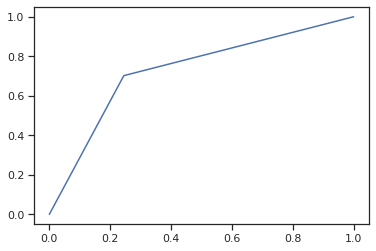

In [ ]:
fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_xgBoost)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

### SMV

In [ ]:
sv = svm.SVC(kernel='linear') 
sv.fit(X_smote , y_smote)

train_pred_svm =  sv.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_svm)*100))

print("Confusion Matrix-SVM TRAIN: ")
print(confusion_matrix(y_train, train_pred_svm))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_svm))

print("-"*40)

test_pred_svm = sv.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_svm)*100))

print("Confusion Matrix-SVM TEST: ")
print(confusion_matrix(y_test, test_pred_svm))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_svm))

Train Accuracy : 77.720% 
Confusion Matrix-SVM TRAIN: 
[[301  76]
 [ 53 149]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       377
           1       0.66      0.74      0.70       202

    accuracy                           0.78       579
   macro avg       0.76      0.77      0.76       579
weighted avg       0.78      0.78      0.78       579

----------------------------------------
Test Accuracy  : 71.724% 
Confusion Matrix-SVM TEST: 
[[74 24]
 [17 30]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.81      0.76      0.78        98
           1       0.56      0.64      0.59        47

    accuracy                           0.72       145
   macro avg       0.68      0.70      0.69       145
weighted avg       0.73      0.72      0.72       145



In [ ]:
param_SVC = { 'C': [1.0,10.0,100.0],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': [1,2,3],
              'cache_size':[100,200,300],
              'coef0':[0.0,1.0,5.0]
             }

cv = GridSearchCV(SVC(), param_SVC, refit = True, verbose = 1).fit(X_smote,y_smote)
print(cv.best_params_)
print(cv.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
{'C': 100.0, 'cache_size': 100, 'coef0': 0.0, 'degree': 1, 'kernel': 'rbf'}
0.8077792494481235


0.7680161252199491

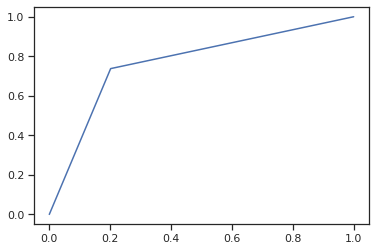

In [ ]:
fpr , tpr , thresolds = metrics.roc_curve(y_train, train_pred_svm)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

0.696699956578376

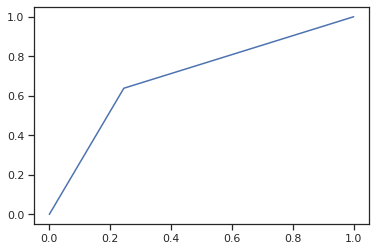

In [ ]:
fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_svm)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

### KNN

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_smote , y_smote)

train_pred_knn =  knn.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_knn)*100))

print("Confusion Matrix-KNN TRAIN: ")
print(confusion_matrix(y_train, train_pred_knn))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_knn))

print("-"*40)

test_pred_knn = knn.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_knn)*100))

print("Confusion Matrix-KNN TEST: ")
print(confusion_matrix(y_test, test_pred_knn))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_knn))

Train Accuracy : 84.111% 
Confusion Matrix-KNN TRAIN: 
[[307  70]
 [ 22 180]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       377
           1       0.72      0.89      0.80       202

    accuracy                           0.84       579
   macro avg       0.83      0.85      0.83       579
weighted avg       0.86      0.84      0.84       579

----------------------------------------
Test Accuracy  : 74.483% 
Confusion Matrix-KNN TEST: 
[[76 22]
 [15 32]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.84      0.78      0.80        98
           1       0.59      0.68      0.63        47

    accuracy                           0.74       145
   macro avg       0.71      0.73      0.72       145
weighted avg       0.76      0.74      0.75       145



In [ ]:
param_knn = {'n_neighbors': [1,2,3,4,5,10], 
             'weights': ['uniform', 'distance'],
             'metric': ['euclidean', 'manhattan']}
cv = GridSearchCV(KNeighborsClassifier(), param_knn, scoring = 'accuracy', cv=5,n_jobs=-1).fit(X_smote,y_smote)
print(cv.best_params_)
print(cv.best_score_)

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
0.8356203090507727


0.8527063581689733

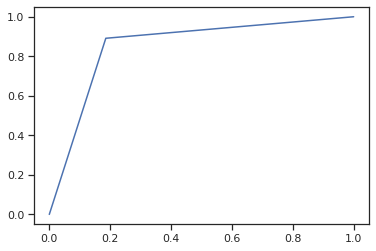

In [ ]:
fpr , tpr , thresolds = metrics.roc_curve(y_train , train_pred_knn)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

0.72818063395571

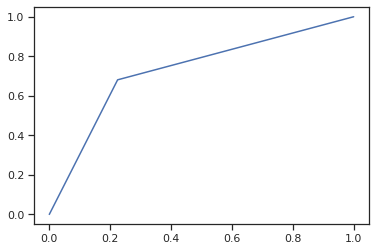

In [ ]:
fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_knn)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

### MLP 

In [ ]:
mlp = MLPClassifier(max_iter=1000)
mlp.fit(X_smote , y_smote)


train_pred_mlp =  mlp.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_mlp)*100))

print("Confusion Matrix-KNN TRAIN: ")
print(confusion_matrix(y_train, train_pred_mlp))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_mlp))

print("-"*40)

test_pred_mlp = mlp.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_mlp)*100))

print("Confusion Matrix-KNN TEST: ")
print(confusion_matrix(y_test, test_pred_mlp))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_mlp))

Train Accuracy : 86.874% 
Confusion Matrix-KNN TRAIN: 
[[321  56]
 [ 20 182]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       377
           1       0.76      0.90      0.83       202

    accuracy                           0.87       579
   macro avg       0.85      0.88      0.86       579
weighted avg       0.88      0.87      0.87       579

----------------------------------------
Test Accuracy  : 77.241% 
Confusion Matrix-KNN TEST: 
[[79 19]
 [14 33]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        98
           1       0.63      0.70      0.67        47

    accuracy                           0.77       145
   macro avg       0.74      0.75      0.75       145
weighted avg       0.78      0.77      0.78       145



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



In [ ]:
param_MLP = {
             'hidden_layer_sizes': [(10,30,10),(20,)],
             'activation': ['tanh', 'relu'],
             'solver': ['sgd', 'adam','lbfgs'],
             'alpha': [0.0001, 0.05],
             'learning_rate': ['constant','adaptive']
}

cv = GridSearchCV(MLPClassifier(max_iter=500), param_MLP, scoring = 'accuracy', cv=5,n_jobs=-1).fit(X_smote,y_smote)
print(cv.best_params_)
print(cv.best_score_)

{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'lbfgs'}
0.819690949227373


0.8762244924757727

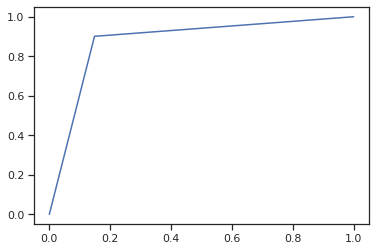

In [ ]:
fpr , tpr , thresolds = metrics.roc_curve(y_train , train_pred_mlp)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

0.75412505427703

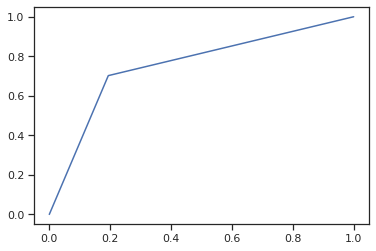

In [ ]:
fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_mlp)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



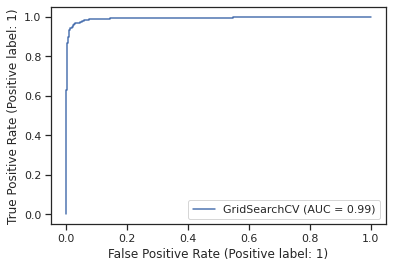

In [ ]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(cv,X_train,y_train)

### deneme 

In [ ]:
clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf.fit(X_smote,y_smote)
y_score = clf.decision_function(X_smote)

fpr, tpr, _ = roc_curve(y_smote, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
roc_display